In [1]:
import os
import logging
import os.path as op
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from nilearn.datasets import fetch_atlas_schaefer_2018
from nilearn import plotting
from nilearn._utils import check_niimg
from nilearn.input_data import NiftiLabelsMasker

/DATA/doeringe/.local/lib/python3.5/site-packages/nilearn/__init__.py:68: FutureWarning: Python 3.5 support is deprecated and will be removed in the 0.8.0 release. Consider switching to Python 3.6 or 3.7
  _python_deprecation_warnings()
/DATA/doeringe/.local/lib/python3.5/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
schaefer = fetch_atlas_schaefer_2018(n_rois=200)

 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


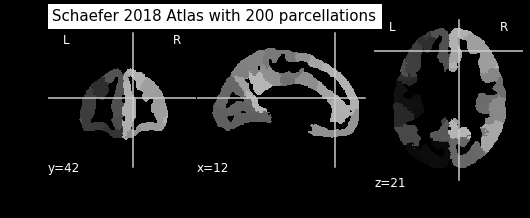

In [17]:
plotting.plot_anat(schaefer.maps, title = "Schaefer 2018 Atlas with 200 parcellations")
plt.show()

In [16]:
subj_path = '/DATA/doeringe/Dokumente/BrainAge/3_SUVR_new/new/'

# List all the subjects in subj_path
subjects = os.listdir(subj_path)

# Read the nifti/img file
#images = []
read_subjects = []
 
for subject in subjects:
    s_path = op.join(subj_path, subject)
    read_subjects.append(s_path)
    
ids = [x[12:30] for x in subjects]

image_list = []
for subj in read_subjects:
        this_image = nib.load(subj)
        niimg = check_niimg(this_image, atleast_4d=True)
        masker = NiftiLabelsMasker(labels_img=schaefer.maps,
                                   standardize=False,
                                   memory='nilearn_cache',
                                   resampling_target='data')
        parcelled = masker.fit_transform(niimg)
        image_list.append(parcelled)

# Get only the data for the subjects in the list

df = pd.DataFrame(np.vstack(image_list), columns=schaefer.labels)
df['ID'] = ids
print(df.head(5))
#t_df = df[df['participant_id'].isin(exist_subj)]
df.to_csv(op.join(subj_path, "OASIS_Schaefer_parcellation.csv"))

   b'7Networks_LH_Vis_1'  b'7Networks_LH_Vis_2'  b'7Networks_LH_Vis_3'  \
0               1.433678               1.492364               1.299953   
1               1.375708               1.307617               1.246074   
2               1.152597               1.278895               1.230773   
3               1.678847               1.696392               1.760881   
4               1.506641               1.512846               1.499237   

   b'7Networks_LH_Vis_4'  b'7Networks_LH_Vis_5'  b'7Networks_LH_Vis_6'  \
0               1.246982               1.015472               1.312704   
1               1.203221               0.424426               1.323045   
2               1.119145               0.816479               0.840217   
3               1.601146               1.131249               1.520349   
4               1.508172               0.908494               1.353894   

   b'7Networks_LH_Vis_7'  b'7Networks_LH_Vis_8'  b'7Networks_LH_Vis_9'  \
0               1.502509            